# Template Matching

Template matching is the **simplest form of object detection**

## How It Works

Scans a image for a provided template by sliding the template target across the larger image.

How we can compare the target template to the image **is the main adjustable option**.

### Comparison Methods

This methods are correlation based metrics, like:

- Square Diference (TM_SQDIFF)
- Normalized Square Diference (TM_SQDIFF_NORMED)
- ...


In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Large Image

This is the image where we'll look for matchings!

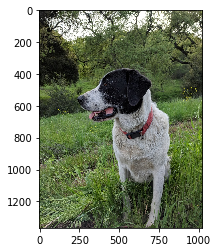

In [3]:
large_image = cv.imread('../assets/sammy.jpg')
large_image = cv.cvtColor(large_image, cv.COLOR_BGR2RGB)
plt.imshow(large_image)

## Template Image

This is the **what we want to match** in the large image!

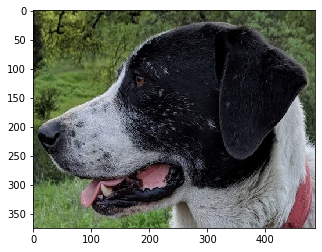

In [4]:
template_image = cv.imread('../assets/sammy_face.jpg')
template_image = cv.cvtColor(template_image, cv.COLOR_BGR2RGB)
plt.imshow(template_image)

## Applying The Methods

In [5]:
methods = [cv.TM_CCOEFF, cv.TM_CCOEFF_NORMED, cv.TM_CCORR, cv.TM_CCORR_NORMED, cv.TM_SQDIFF, cv.TM_SQDIFF_NORMED]

In [14]:
def method_top_left(method, min_location, max_location):
    if method in [cv.TM_SQDIFF, cv.TM_SQDIFF_NORMED]:
        return min_location # (x,y)
    else:
        return max_location # (x,y)

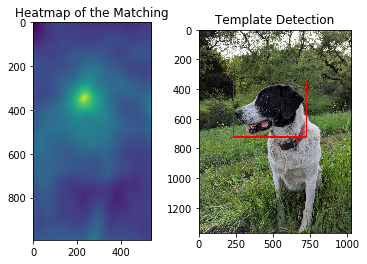

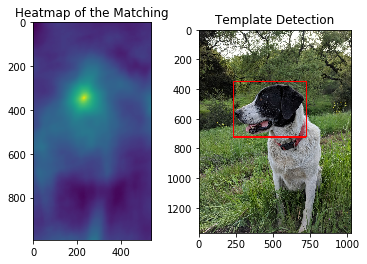

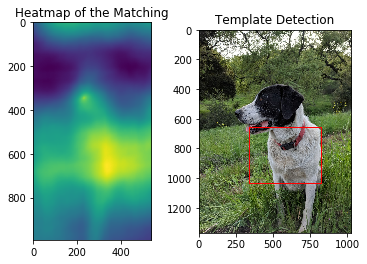

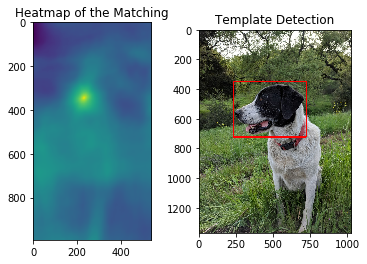

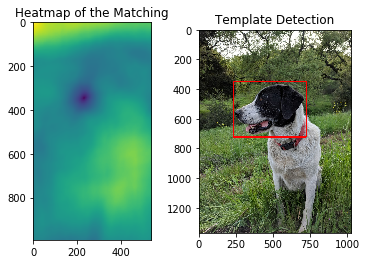

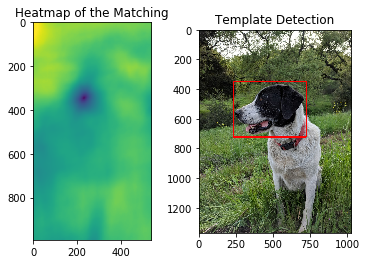

In [19]:
for method in methods:
    # 
    # Create image copy
    large_image_copy = large_image.copy()
    # 
    # Template Matching
    match_heatmap = cv.matchTemplate(large_image_copy, template_image, method)
    # 
    # Get the Min & Max
    min_val, max_val, min_location, max_location = cv.minMaxLoc(match_heatmap)
    # 
    # Find Top Left of the Match (pt1)
    top_left = method_top_left(method, min_location, max_location)
    # 
    # Find Bottom Right of the Match (pt2)
    height, width, channels = template_image.shape
    bottom_right = (top_left[0] + width, top_left[1] + height)
    # 
    # Draw
    cv.rectangle(large_image_copy, top_left,bottom_right, (255,0,0), 5)
    # 
    # Plot
    plt.subplot(121)
    plt.imshow(match_heatmap)
    plt.title("Heatmap of the Matching")
    plt.subplot(122)
    plt.imshow(large_image_copy)
    plt.title("Template Detection")
    plt.show() # Dont overwritte
        